In [ ]:
import numpy as np     #Used for numerical computations.
import matplotlib.pyplot as plt   #Used for plotting the signals
from scipy.io import wavfile     #Reads and writes wav audio files
import IPython.display as ipd   #allows playing audio in jupyter notebook

In [ ]:
# Set seed for reproducibility
np.random.seed(7)

def g1(u):       #activation function for ICA
    return np.tanh(u)

def g1_dash(u):   #derivative function
    d = g1(u)
    return 1 - d * d

def FastICA(X, vectors, eps):
    """FastICA technique is used.
    The function returns one independent component.
    X is assumed to be centered and whitened.
    """
    size = X.shape[0]  #no of audio  signals
    n = X.shape[1]   #no of data points
    w1 = np.random.rand(size)
    w2 = np.random.rand(size)
    w1 = w1 / np.linalg.norm(w1)
    w2 = w2 / np.linalg.norm(w2)

    iteration = 0
    while np.abs(np.dot(w1.T, w2)) < (1 - eps) and iteration < 500:  #to prevent infinite loop iteration < 500
        w1 = w2
        first = np.dot(X, g1(np.dot(w2.T, X))) / n
        second = np.mean(g1_dash(np.dot(w2.T, X))) * w2
        w2 = first - second
        w3 = w2
        for vector in vectors:
            w3 = w3 - np.dot(w2.T, vector) * vector
        w2 = w3 / np.linalg.norm(w3)
        iteration += 1
    return w1



In [ ]:
# Read the mixed signals (Change path if needed)
rate1, data1 = wavfile.read('/content/audio_mixedX1.wav')
rate2, data2 = wavfile.read('/content/audio_mixedY1.wav')

if data1.ndim > 1:
    data1 = data1[:, 0]  # Convert to mono if stereo
if data2.ndim > 1:
    data2 = data2[:, 0]

# Play the mixed audio files
print("Playing mixedX.wav")
ipd.display(ipd.Audio(data1, rate=rate1))
print("Playing mixedY.wav")
ipd.display(ipd.Audio(data2, rate=rate2))

Playing mixedX.wav


Playing mixedY.wav


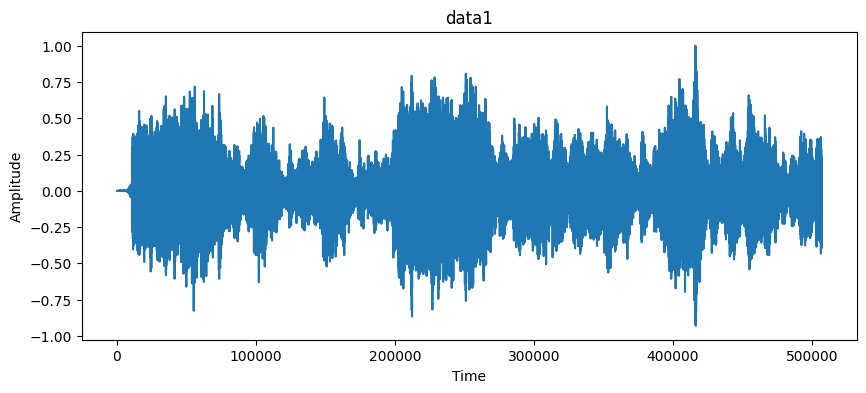

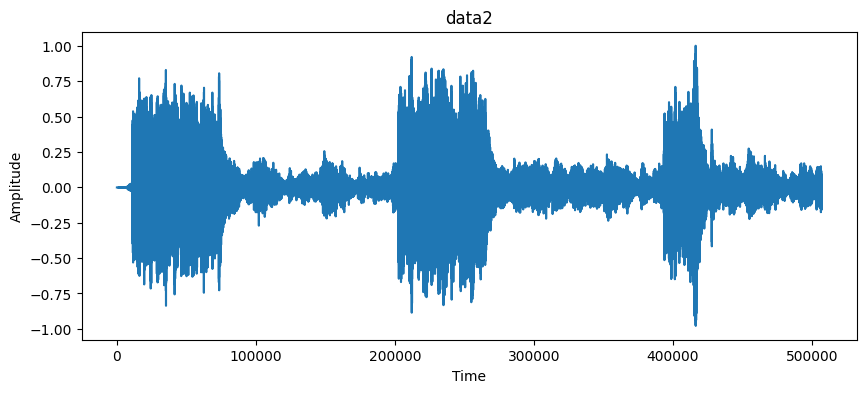

In [ ]:
# Centering and normalizing the signals
data1 = data1 - np.mean(data1)
data1 = data1 / np.max(np.abs(data1))
data2 = data2 - np.mean(data2)
data2 = data2 / np.max(np.abs(data2))

# Plot raw signals
#Displays time-domain waveforms of the mixed signals.
plt.figure(figsize=(10, 4))
plt.plot(data1)
plt.title("data1")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(data2)
plt.title("data2")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

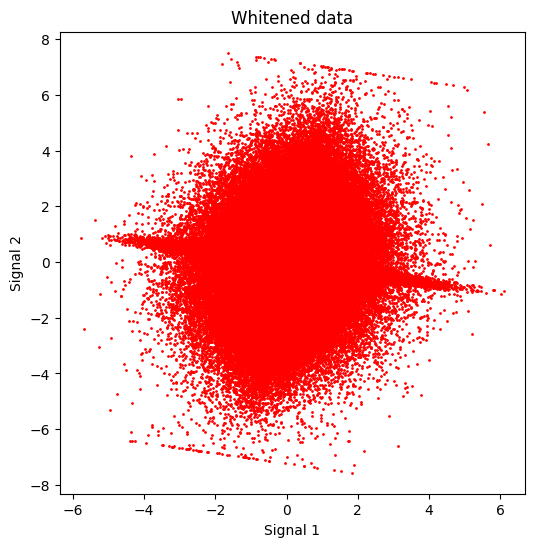

In [ ]:
# Create matrix
signals = np.vstack([data1, data2])

# Whitening function
def whitenMatrix(X):
    X_mean = np.mean(X, axis=1, keepdims=True)
    X_centered = X - X_mean
    cov = np.cov(X_centered)
    D, E = np.linalg.eigh(cov)
    D = np.diag(1.0 / np.sqrt(D + 1e-5))
    whitening_matrix = np.dot(E, np.dot(D, E.T))
    return np.dot(whitening_matrix, X_centered)

# Whitening matrix
whiteMatrix = whitenMatrix(signals)
X = whiteMatrix

# Plot whitened data:  Plots the whitened signals in a 2D scatter plot.
plt.figure(figsize=(6, 6))
plt.scatter(X[0], X[1], s=1, color='red')
plt.xlabel('Signal 1')
plt.ylabel('Signal 2')
plt.title("Whitened data")
plt.show()

In [ ]:
# Perform FastICA
vectors = []
for i in range(X.shape[0]):
    vector = FastICA(X, vectors, eps=1e-11)  #Finds independent components using FastICA and stores them in vectors
    vectors.append(vector)

# Compute unmixing matrix
W = np.vstack(vectors)
S = np.dot(W, whiteMatrix)

# Ensure signals are properly scaled
S = S / np.max(np.abs(S), axis=1, keepdims=True)

In [ ]:
# Save separated audio files (Change path if needed)
wavfile.write('/content/separate1.wav', rate1, (S[0] * 32767).astype(np.int16))
wavfile.write('/content/separate2.wav', rate1, (S[1] * 32767).astype(np.int16))

# Play the separated audio files
print("Playing separate1.wav")
ipd.display(ipd.Audio('/content/separate1.wav'))
print("Playing separate2.wav")
ipd.display(ipd.Audio('/content/separate2.wav'))

Playing separate1.wav


Playing separate2.wav


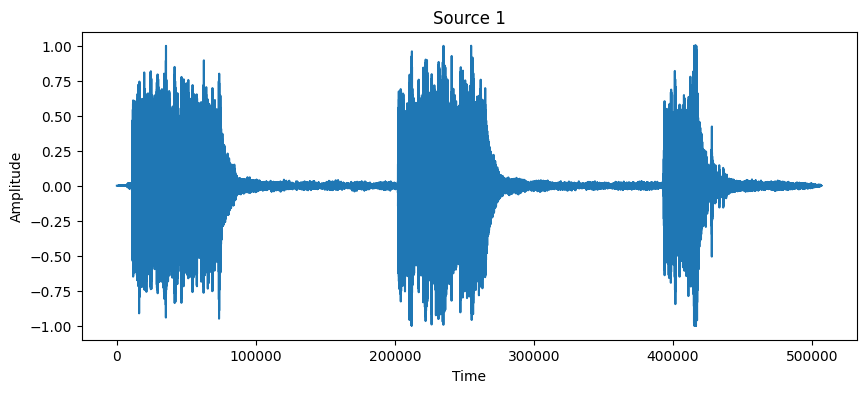

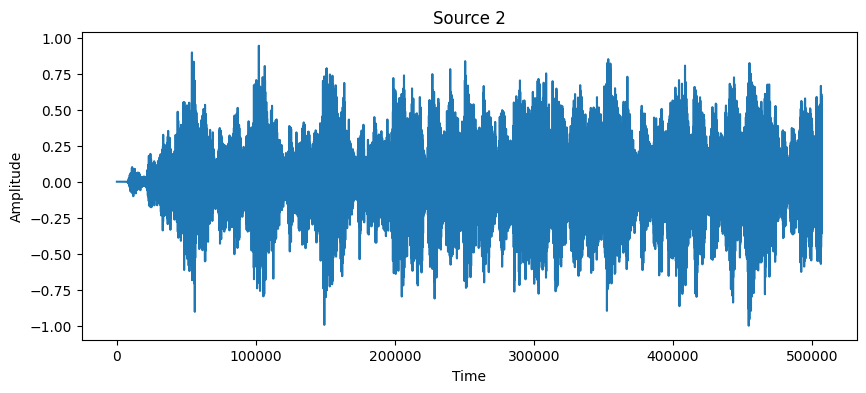

In [ ]:
# Plot separated signals
#Displays waveforms of the separated signals.
plt.figure(figsize=(10, 4))
plt.plot(S[0])
plt.title("Source 1")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(S[1])
plt.title("Source 2")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

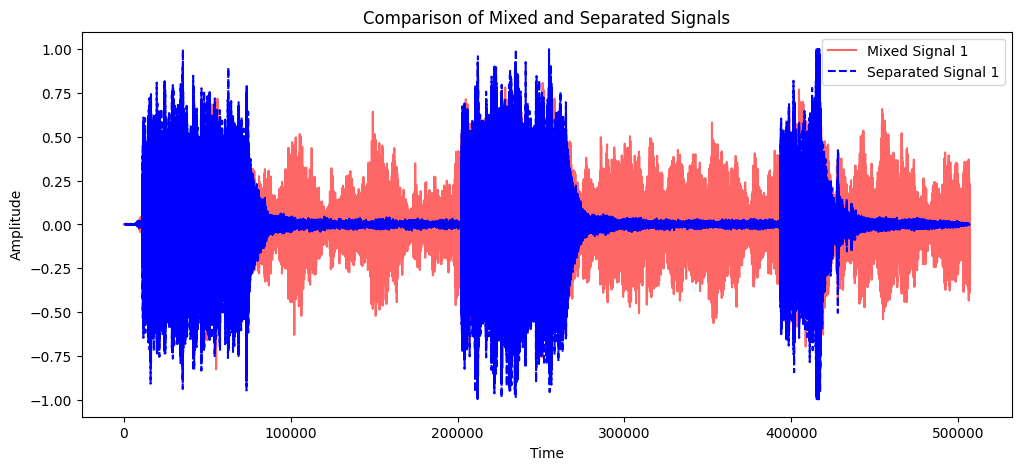

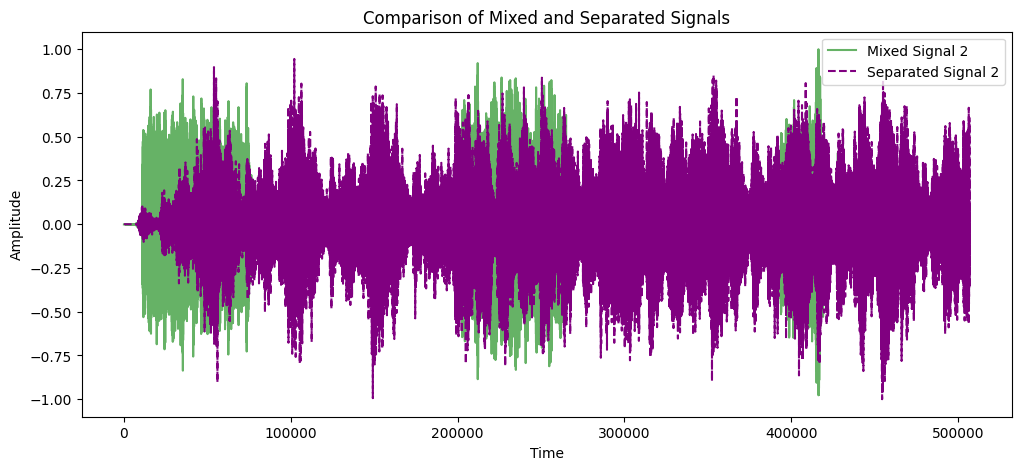

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(data1, label='Mixed Signal 1', color='red', alpha=0.6)
plt.plot(S[0], label='Separated Signal 1', color='blue', linestyle='dashed')
plt.title("Comparison of Mixed and Separated Signals")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(data2, label='Mixed Signal 2', color='green', alpha=0.6)
plt.plot(S[1], label='Separated Signal 2', color='purple', linestyle='dashed')
plt.title("Comparison of Mixed and Separated Signals")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
